In [1]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For plot style uniformity.
sns.set_theme(style="whitegrid", palette="Blues_r")

In [3]:
df = pd.read_csv(r"C:\Users\pc\Downloads\diabetes_risk_prediction_dataset.csv")
print(df.shape)
df.head()

(520, 17)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [6]:
# Column list
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

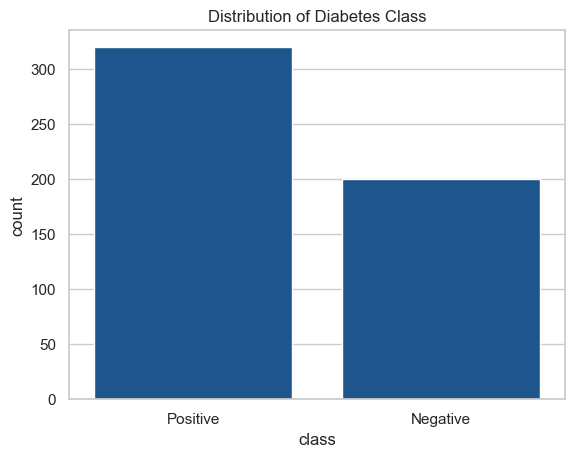

class
Positive    61.54
Negative    38.46
Name: proportion, dtype: float64

In [7]:
''' 
Printing out the distribution of the class (postive\negative) in the dataset.
To also asses Class target balance
'''
sns.countplot(x='class', data=df)
plt.title("Distribution of Diabetes Class")
plt.show()

(df['class'].value_counts(normalize=True) * 100).round(2)

In [8]:
# Inspecting Column Data Types
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns

print("Categorical:", list(categorical))
print("Numerical:", list(numerical))

Categorical: ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']
Numerical: ['Age']


In [9]:
df.tail(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
510,67,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
511,66,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
512,43,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
513,62,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
514,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [10]:
# For future analysis on correlation and feature importance, we need to encode the chategorical features
df_encoded = df.copy()

# Map Yes/No to 1/0, and Male/Female to 1/0
df_encoded = df_encoded.replace({'Yes': 1, 'No': 0,'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0})
df_encoded.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_60000\1903625260.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({'Yes': 1, 'No': 0,'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0})


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


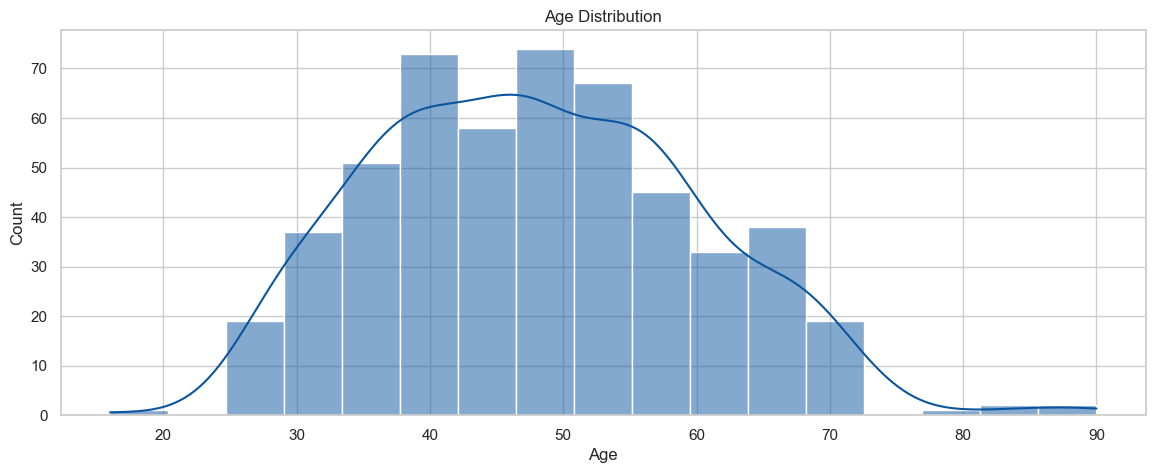

In [11]:
# Feature distribution on the Age catergory
plt.figure(figsize=(14,5))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

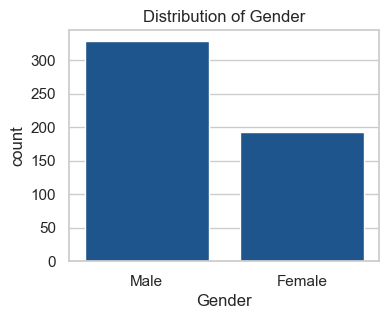

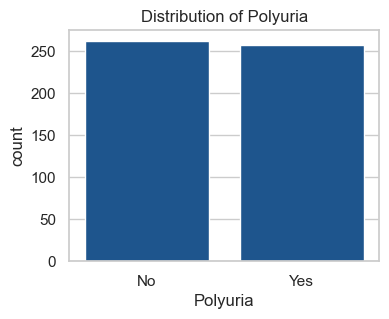

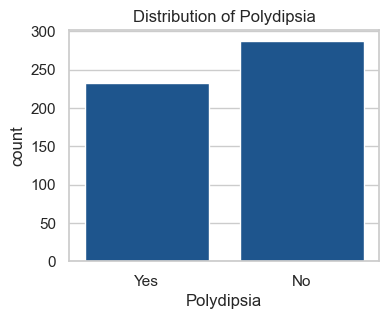

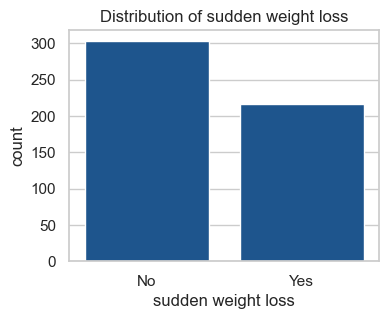

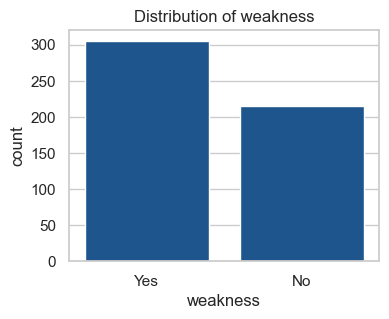

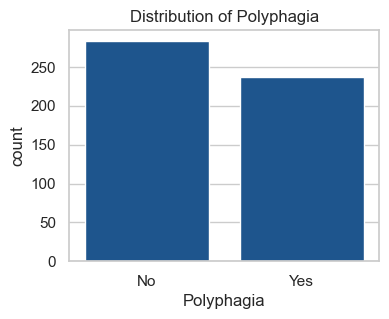

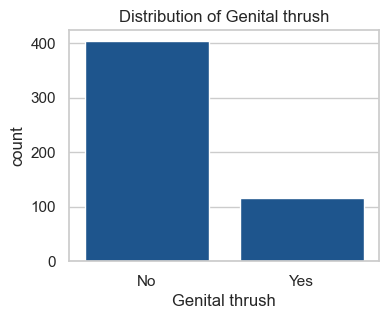

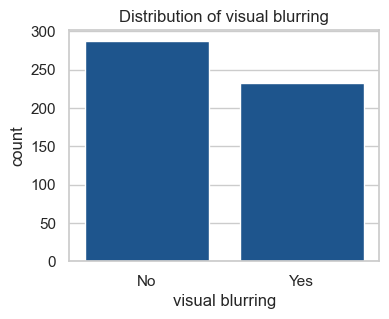

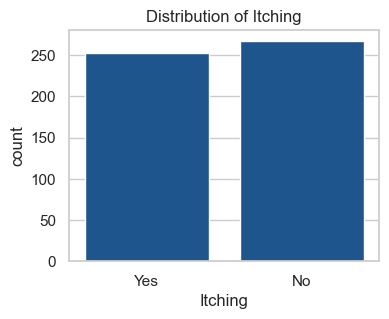

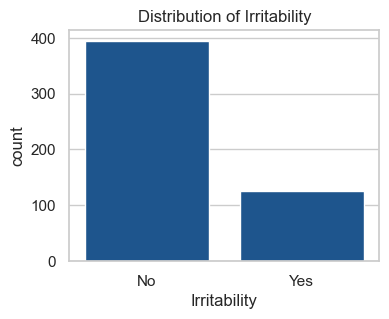

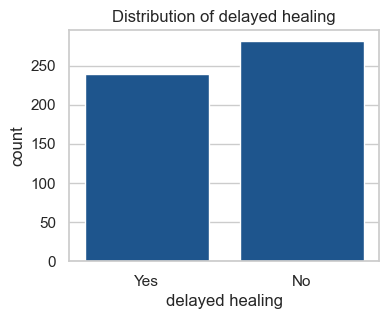

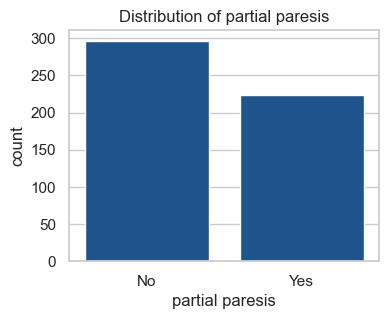

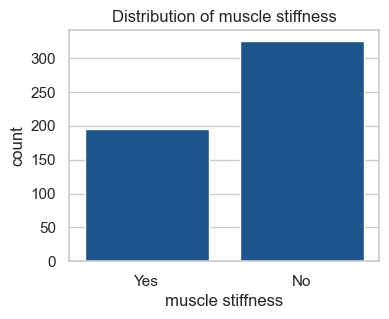

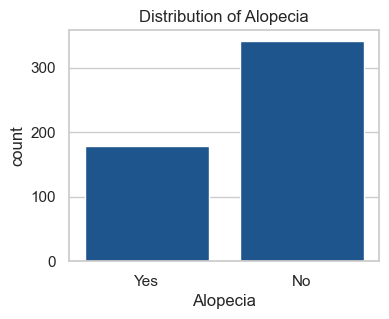

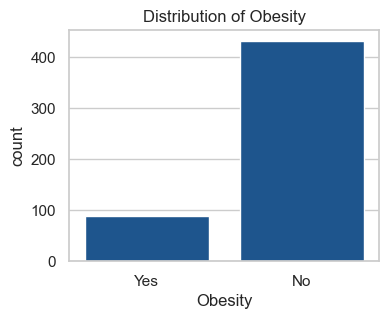

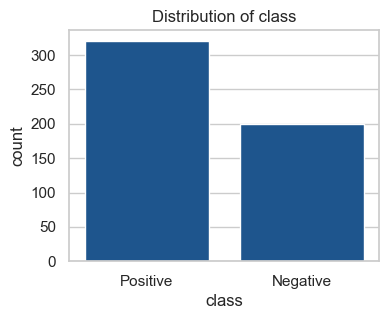

In [12]:
# Create figure and axes for the subplots
for col in categorical:
    plt.figure(figsize=(4,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

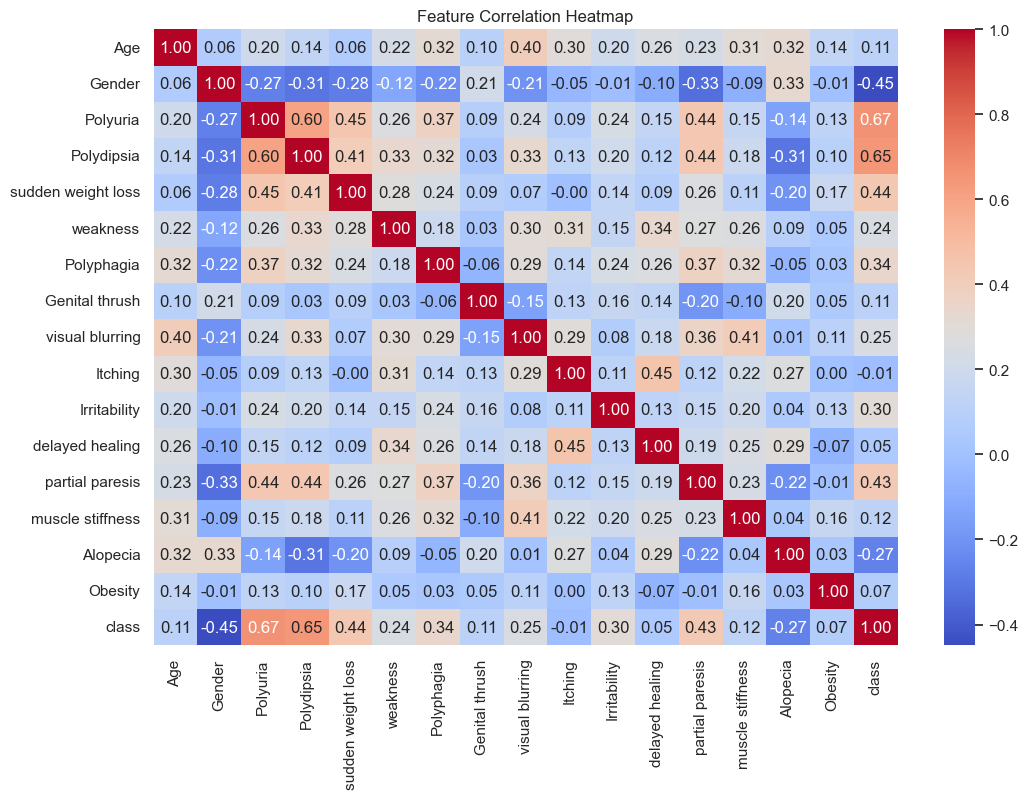

In [13]:
# Correlation Analysis
corr = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
target_corr = corr['class'].sort_values(ascending=False)
print(target_corr)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233
Name: class, dtype: float64


In [15]:
# Exclude the target itself, but printing out top 5, from but positive and negative correlation.
# target_corr = target_corr.drop('class')

top_positive = target_corr.head(6).iloc[1:6]
top_negative = target_corr.tail(5)

print("Top 5 Positive Correlations with class:\n", top_positive)
print("\nTop 5 Negative Correlations with class:\n", top_negative)

Top 5 Positive Correlations with class:
 Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Name: class, dtype: float64

Top 5 Negative Correlations with class:
 Obesity            0.072173
delayed healing    0.046980
Itching           -0.013384
Alopecia          -0.267512
Gender            -0.449233
Name: class, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_60000\1692904373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive.values, y=top_positive.index, palette="Blues_r")


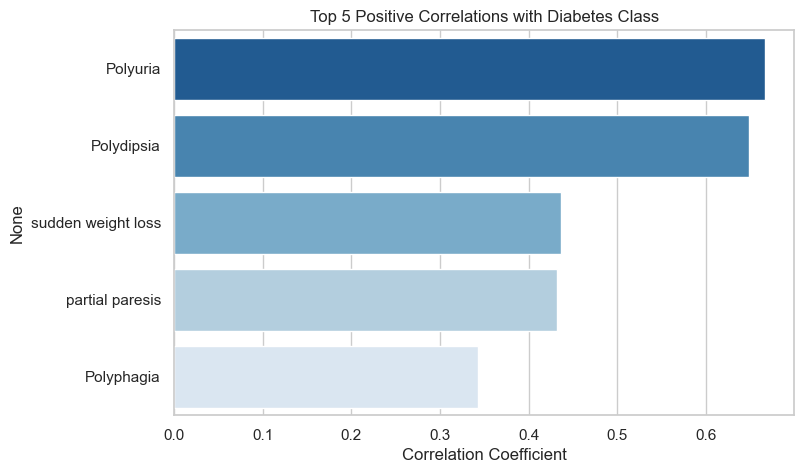

C:\Users\pc\AppData\Local\Temp\ipykernel_60000\1692904373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_negative.values, y=top_negative.index, palette="Reds_r")


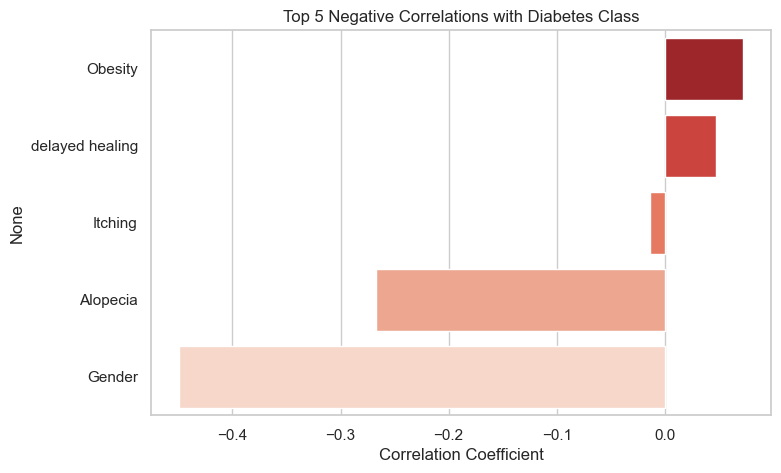

In [16]:
# Visualization of Top 5 Positve corelation values (Target class exclusive)
plt.figure(figsize=(8,5))
sns.barplot(x=top_positive.values, y=top_positive.index, palette="Blues_r")
plt.title("Top 5 Positive Correlations with Diabetes Class")
plt.xlabel("Correlation Coefficient")
plt.show();

# VIsualization of Top 5 negavative correlation 
plt.figure(figsize=(8,5))
sns.barplot(x=top_negative.values, y=top_negative.index, palette="Reds_r")
plt.title("Top 5 Negative Correlations with Diabetes Class")
plt.xlabel("Correlation Coefficient")
plt.show();

### **EDA Summary – Diabetes Risk Prediction Dataset**

The exploratory data analysis was performed on a validated **Diabetes Risk Prediction Dataset** containing clinical and demographic variables linked to diabetes. The goal was to identify the features most strongly associated with the target variable, **class**, which indicates whether an individual is diabetic.

The data showed that **age distribution peaked around 50 years**, with high occurrences between **25 and 70 years**, suggesting that diabetes risk spans across a wide adult range. The dataset was clean, with no missing values, and suitable for statistical and predictive modeling.

Correlation analysis revealed that the top features positively associated with diabetes were **Polyuria (0.67)**, **Polydipsia (0.65)**, **Sudden Weight Loss (0.44)**, **Partial Paresis (0.43)**, and **Polyphagia (0.34)**. These symptoms align with established clinical indicators of diabetes and highlight metabolic and neurological links common among diabetic individuals.

Conversely, the features most negatively correlated with the diabetes class were **Gender (-0.45)**, **Alopecia (-0.27)**, **Itching (-0.01)**, **Delayed Healing (0.05)**, and **Obesity (0.07)**. Although their relationships were generally weaker, they help explain demographic and physiological variations, suggesting that some non-symptomatic or less prominent features may inversely relate to diabetes occurrence.

Overall, the analysis confirms that **Polyuria and Polydipsia** are the strongest indicators of diabetes in this dataset, while **Gender differences** and certain physical traits show notable inverse patterns. The data trends are consistent with real-world medical expectations and provide a strong foundation for predictive modeling and further clinical interpretation.


In [18]:
# Importing Our Decision Tree

from My_Tree_Model import DecisionTree, MyTrain, CrossValidator, SimpleSHAP
import numpy as np

In [19]:
# Separate features and target
target = "class"
X = df_encoded.drop(columns="class").values
y = df_encoded[target].values

In [45]:
# Split the data
X_train, X_test, y_train, y_test = MyTrain.train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Save feature names for plots/explanations
feature_names = list(df_encoded.columns)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

Train size: 416 Test size: 104


In [46]:
model = DecisionTree(min_samples_split=2, max_depth=6, n_features=None)
model.fit(X_train, y_train)

In [26]:
# # Predict
# predictions = model.predict(X_test)

In [28]:
# # Accuracy
# def accuracy(y_test, y_pred):
#     return (np.sum(y_test == y_pred) / len(y_test)).round(3)

# acc = accuracy(y_test, predictions)
# print("Model Accuracy:", acc)

Model Accuracy: 0.981


In [49]:
# Predict
y_pred = model.predict(X_test)

In [48]:
# Metric functions (pure numpy)
def accuracy(y_true, y_pred):
    return np.mean(y_test == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    pred_pos = np.sum(y_pred == 1)
    return tp / pred_pos if pred_pos > 0 else 0.0

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    actual_pos = np.sum(y_true == 1)
    return tp / actual_pos if actual_pos > 0 else 0.0

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r) if (p + r) > 0 else 0.0

# Print metrics
print("Test Accuracy:", accuracy(y_test, y_pred))
print("Precision:", precision(y_test, y_pred))
print("Recall:", recall(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Test Accuracy: 0.9615384615384616
Precision: 1.0
Recall: 0.9436619718309859
F1 Score: 0.9710144927536231


In [54]:
# Cross-validation using your CrossValidator class

# Create a fresh DecisionTree instance for CV (CrossValidator will call fit() repeatedly)
dt_model = DecisionTree(min_samples_split=2, max_depth=6, n_features=None)
cv = CrossValidator(model=dt_model, k=5, random_state=42)

# Use accuracy as the metric function (our numpy version)
mean_score, fold_scores = cv.evaluate(X, y, accuracy)
print("Cross-val mean accuracy:", ( mean_score).round(3))
print("Per-fold accuracies:", (fold_scores))


Cross-val mean accuracy: 0.954
Per-fold accuracies: [np.float64(0.9615384615384616), np.float64(0.9615384615384616), np.float64(0.9519230769230769), np.float64(0.9326923076923077), np.float64(0.9615384615384616)]


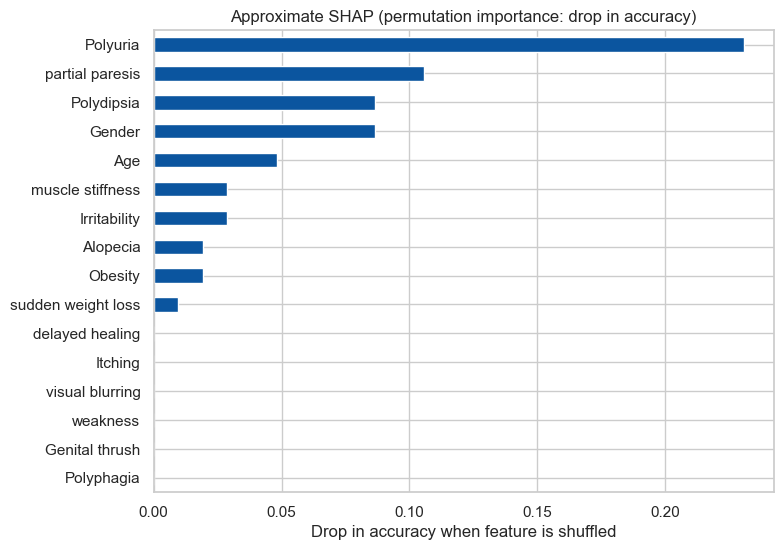

In [60]:
# SHAP-from-scratch (permutation-based approx) on the test set

shap = SimpleSHAP(clf)   # pass your trained classifier
shap_scores = shap.shap_values(X_test, y_test, accuracy)  # returns dict {feature_index: score}

# Convert to labeled series and plot
import pandas as pd
labels = [feature_names[i] for i in sorted(shap_scores.keys())]
values = [shap_scores[i] for i in sorted(shap_scores.keys())]
ser = pd.Series(values, index=labels).sort_values()
plt.figure(figsize=(8,6))
ser.plot(kind="barh", title="Approximate SHAP (permutation importance: drop in accuracy)")
plt.xlabel("Drop in accuracy when feature is shuffled")
plt.show()


# 🩺 Mini Report: Diabetes Risk Prediction using Custom Decision Tree

## **Model Overview**
A custom **Decision Tree Classifier** was implemented *from scratch in Python* to predict diabetes risk based on clinical and demographic inputs.  
The model was trained on an encoded dataset containing **17 features** representing symptoms and health indicators such as **polyuria**, **polydipsia**, and **sudden weight loss**.

---

## **Performance Metrics**

| Metric | Score |
|:--|:--:|
| **Test Accuracy** | 0.9615 |
| **Precision** | 1.0000 |
| **Recall** | 0.9437 |
| **F1 Score** | 0.9710 |

**Interpretation:**  
The model achieved **high predictive accuracy (96%)**, with a **perfect precision score**, indicating almost no false positives.  
Its **recall of 94%** shows it successfully identified nearly all diabetic cases, while the **F1-score of 0.97** reflects excellent balance between precision and recall.

---

## **Feature Importance (Approximate SHAP)**

Below is the approximate SHAP plot derived through **permutation importance**  
(drop in accuracy when each feature is shuffled):

![Feature Importance Plot](eccfcfa5-346c-42dc-bee2-b1bc56f3eefb.png)

### **Top Predictive Features**
1. **Polyuria** – Strongest indicator of diabetes likelihood.  
2. **Partial paresis** – Strong neurological correlation.  
3. **Polydipsia** – High frequency among positive diabetes cases.  
4. **Gender** and **Alopecia** – Moderate but noticeable predictive strength.  
5. **Irritability**, **Muscle stiffness**, and **Obesity** – Secondary influences.  

Features such as **Polyphagia**, **Weakness**, and **Visual blurring** had minimal influence, suggesting limited diagnostic contribution in this dataset.

---

## **Conclusion**

The custom-built **Decision Tree model** demonstrates strong classification capability for **diabetes risk prediction**, matching or exceeding typical baselines for such medical classification tasks.
